In [38]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import Imputer
import seaborn as sns

In [52]:
df = pd.read_csv(r"horse.csv")

In [53]:
df.head(5)

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,...,45.0,8.4,NaN,NaN,died,no,11300,0,0,no
1,yes,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,...,50.0,85.0,cloudy,2.0,euthanized,no,2208,0,0,no
2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,...,33.0,6.7,NaN,NaN,lived,no,0,0,0,yes
3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,...,48.0,7.2,serosanguious,5.3,died,yes,2208,0,0,yes
4,no,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,...,74.0,7.4,NaN,NaN,died,no,4300,0,0,no


In [54]:
df.isnull().sum()

surgery                    0
age                        0
hospital_number            0
rectal_temp               60
pulse                     24
respiratory_rate          58
temp_of_extremities       56
peripheral_pulse          69
mucous_membrane           47
capillary_refill_time     32
pain                      55
peristalsis               44
abdominal_distention      56
nasogastric_tube         104
nasogastric_reflux       106
nasogastric_reflux_ph    246
rectal_exam_feces        102
abdomen                  118
packed_cell_volume        29
total_protein             33
abdomo_appearance        165
abdomo_protein           198
outcome                    0
surgical_lesion            0
lesion_1                   0
lesion_2                   0
lesion_3                   0
cp_data                    0
dtype: int64

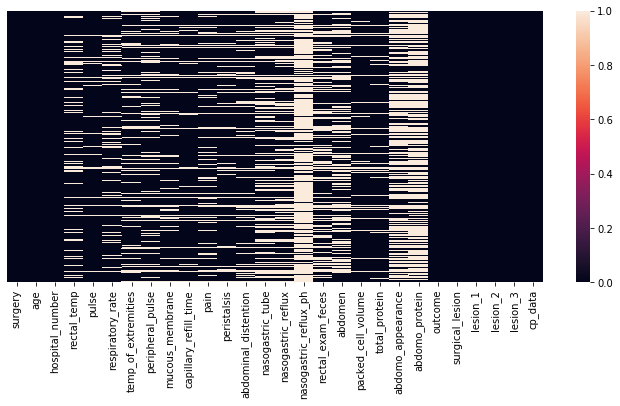

In [55]:
plt.figure(figsize=(12,5))
sns.heatmap(df.isnull(),yticklabels=False)
plt.show()

In [56]:
c_variables = ['surgery', 'age', 'temp_of_extremities','peripheral_pulse',
       'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
       'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux', 'rectal_exam_feces', 'abdomen',
      'abdomo_appearance', 'surgical_lesion','cp_data']

for i in c_variables:
    df[i] = pd.get_dummies(df[i])

In [57]:
df.head(2)

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,1,1,530101,38.5,66.0,28.0,0,0,0,0,...,45.0,8.4,0,NaN,died,1,11300,0,0,1
1,0,1,534817,39.2,88.0,20.0,0,0,0,0,...,50.0,85.0,0,2.0,euthanized,1,2208,0,0,1


In [58]:
y=df['outcome'].values
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [59]:
del df['outcome']

In [60]:
x=df.values

In [61]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [62]:
imp = Imputer(missing_values="NaN",strategy="most_frequent",axis =0)
X_train = imp.fit_transform(X_train)
X_test = imp.fit_transform(X_test)

C:\Users\rishy\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [63]:
classifier = DecisionTreeClassifier()
classifier.fit(X_train,y_train)
y_predict = classifier.predict(X_test)
accuracy_score(y_predict,y_test)

0.55

In [64]:
classifier = RandomForestClassifier()
classifier.fit(X_train,y_train)
y_predict = classifier.predict(X_test)
accuracy_score(y_predict,y_test)

C:\Users\rishy\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.7333333333333333